In [1]:
# === 1. Importar bibliotecas ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

In [3]:
# === 2. Cargar y preparar datos ===
digits = load_digits()
X = digits.data  # (1797, 64)
y = digits.target

In [4]:
# Normalizar entre 0 y 1
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [17]:
# === 3. Construir autoencoder ===
input_dim = X_train.shape[1]  # 64
encoding_dim = 3  # para visualizar

In [18]:
# Codificador
input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
encoded = Dense(encoding_dim, activation='linear', name="bottleneck")(encoded)

In [19]:
# Decodificador
decoded = Dense(32, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

In [20]:
# Modelos
autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, encoded)

autoencoder.compile(optimizer='adam', loss='mse')

In [26]:
# === 4. Entrenar autoencoder ===
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=64,
                          shuffle=True,
                          validation_data=(X_test, X_test),
                          verbose=1)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0501 - val_loss: 0.0490
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0485 - val_loss: 0.0488
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0486 - val_loss: 0.0485
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0488 - val_loss: 0.0484
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0483 - val_loss: 0.0481
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0479 - val_loss: 0.0480
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0468 - val_loss: 0.0476
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0483 - val_loss: 0.0477
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0478 - val_loss: 0.0474
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0475 - val_loss: 0.0472
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0465 - val_loss: 0.0470
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0459 - val_

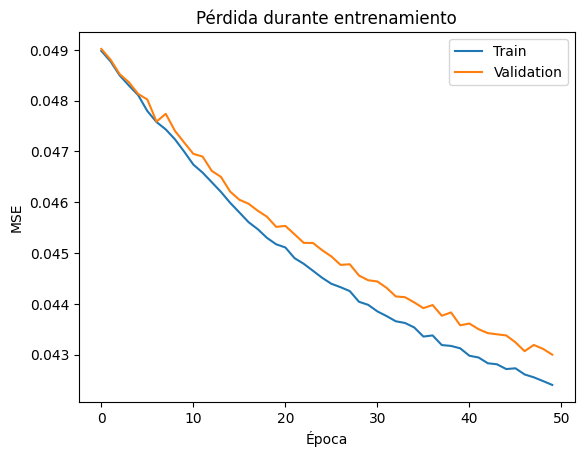

In [27]:
# === 5. Visualizar pérdida durante entrenamiento ===
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title("Pérdida durante entrenamiento")
plt.xlabel("Época")
plt.ylabel("MSE")
plt.legend()
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


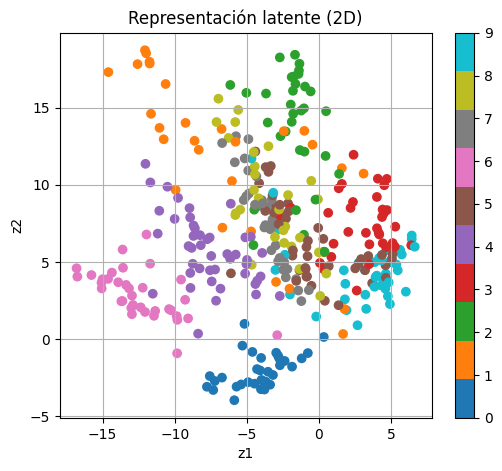

In [28]:
# === 6. Visualizar codificación 2D ===
encoded_imgs = encoder.predict(X_test)

plt.figure(figsize=(6, 5))
plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c=y_test, cmap='tab10')
plt.colorbar()
plt.title("Representación latente (2D)")
plt.xlabel("z1")
plt.ylabel("z2")
plt.grid(True)
plt.show()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


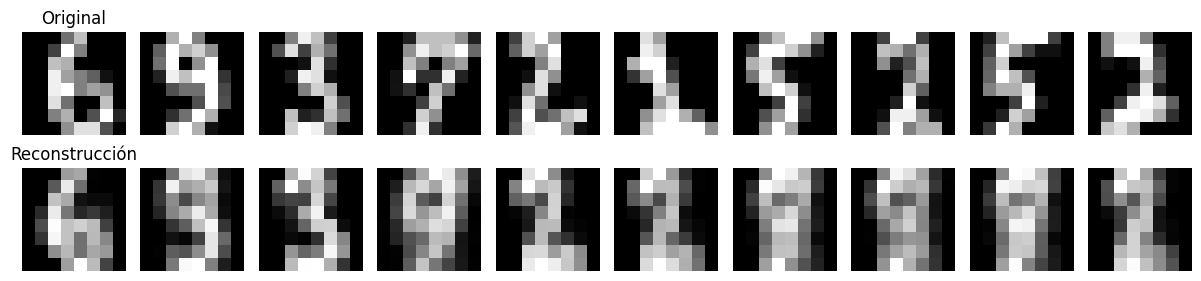

In [29]:
# === 7. Visualizar reconstrucción ===
decoded_imgs = autoencoder.predict(X_test)

fig, axes = plt.subplots(2, 10, figsize=(12, 3))
for i in range(10):
    # original
    axes[0, i].imshow(X_test[i].reshape(8, 8), cmap='gray')
    axes[0, i].axis('off')
    # reconstrucción
    axes[1, i].imshow(decoded_imgs[i].reshape(8, 8), cmap='gray')
    axes[1, i].axis('off')
axes[0, 0].set_title("Original")
axes[1, 0].set_title("Reconstrucción")
plt.tight_layout()
plt.show()

In [30]:
# === 8. Acceder a los pesos del codificador ===
# Muestra los pesos de la capa densa de entrada
weights, biases = autoencoder.get_layer(index=1).get_weights()
print("Pesos de codificador (W_e):\n", weights)
print("Sesgos del codificador (b_e):\n", biases)

Pesos de codificador (W_e):
 [[-1.80602133e-01  1.93470895e-01  2.30132639e-01 ... -7.26217031e-03
   1.38951242e-01 -1.19867325e-01]
 [-8.18321347e-01  4.51657027e-02 -1.77503116e-02 ... -9.43433791e-02
  -3.36723238e-01  4.70086545e-01]
 [-7.63503090e-02  4.74657416e-01  1.69239026e-02 ... -5.11642965e-03
  -3.11125636e-01 -1.39997333e-01]
 ...
 [ 4.65567969e-02 -2.79912174e-01  2.65924305e-01 ... -9.67386067e-02
  -2.30978621e-04  1.48704216e-01]
 [ 2.30576783e-01 -2.33950540e-01  2.97407985e-01 ... -1.72778562e-01
  -1.61413491e-01 -1.72081545e-01]
 [-2.70944592e-02  2.62142569e-01  1.64691463e-01 ...  2.34823167e-01
  -4.69583452e-01 -2.57761449e-01]]
Sesgos del codificador (b_e):
 [-0.0519711   0.18657446  0.19601019  0.00657156  0.08703984  0.20205553
  0.08368278  0.09173503  0.12612367  0.09003522  0.1503636  -0.02687964
 -0.01875282  0.06836493  0.02642894 -0.04991203  0.2497728   0.04465614
 -0.04389047 -0.01729066 -0.0576496   0.11479335  0.03716685  0.10485864
  0.26758227

## Generación del espacio latente

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
1

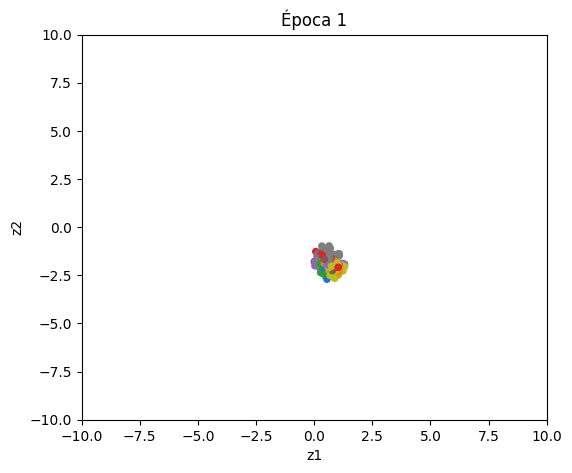

In [31]:
# === 1. IMPORTAR LIBRERÍAS ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# === 2. CARGAR Y NORMALIZAR DATOS ===
digits = load_digits()
X = digits.data
y = digits.target

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# === 3. ARCHITECTURA DEL AUTOENCODER ===
input_dim = X_train.shape[1]
encoding_dim = 2  # Latente 2D

input_layer = Input(shape=(input_dim,))
encoded = Dense(32, activation='relu')(input_layer)
bottleneck = Dense(encoding_dim, activation='linear', name='bottleneck')(encoded)
decoded = Dense(32, activation='relu')(bottleneck)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, decoded)
encoder = Model(input_layer, bottleneck)

autoencoder.compile(optimizer='adam', loss='mse')

# === 4. ANIMAR EL ENTRENAMIENTO ===
epochs = 60
latent_history = []

for epoch in range(epochs):
    autoencoder.fit(X_train, X_train, epochs=1, batch_size=64, shuffle=True, verbose=0)
    encoded_points = encoder.predict(X_test)
    latent_history.append(encoded_points)

# === 5. ANIMACIÓN ===
fig, ax = plt.subplots(figsize=(6, 5))
initial_latent = latent_history[0]
sc = ax.scatter(initial_latent[:, 0], initial_latent[:, 1], c=y_test, cmap='tab10', s=20)
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_title("Evolución del espacio latente")
ax.set_xlabel("z1")
ax.set_ylabel("z2")

def update(frame):
    sc.set_offsets(latent_history[frame])
    ax.set_title(f"Época {frame+1}")
    return sc,

ani = FuncAnimation(fig, update, frames=len(latent_history), interval=300, repeat=False)
HTML(ani.to_jshtml())